# This document is an attempt to gather the most relevant and salient features of the data. 

### Reading the data
- Import necessary libraries: **pandas**
- Reading the data by *read_csv* function in pandas

In [1]:
import pandas as pd
data1 = pd.read_csv('data/data1.csv')

### Counting the number of values in each column.

In [2]:
data1.count()

STATE/UT                                               9017
DISTRICT                                               9017
Year                                                   9017
Rape                                                   9017
Kidnapping and Abduction                               9017
Dowry Deaths                                           9017
Assault on women with intent to outrage her modesty    9017
Insult to modesty of Women                             9017
Cruelty by Husband or his Relatives                    9017
Importation of Girls                                   9017
dtype: int64

### Metadata of Years.

In [3]:
data1.Year.unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012])

### Displaying the total values of each crime, each state and each year.

Please note: The District with attribute value "Total" means the aggregated values of the respective districts of that particular State.

__Dataframe.sample()__ : Displays the random 5 rows from the whole dataset.

In [4]:
data1 = data1[data1.DISTRICT == "TOTAL"]
delhi = data1[data1.DISTRICT == "DELHI UT TOTAL"]
dt1 = pd.concat([data1,delhi])
dt1.sample(5)


,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
7810,MADHYA PRADESH,TOTAL,2011,3406,1088,811,6665,762,3732,45
8668,MANIPUR,TOTAL,2012,63,133,0,49,1,43,0
2336,GUJARAT,TOTAL,2004,339,905,58,757,164,3955,0
744,ANDHRA PRADESH,TOTAL,2002,1002,854,449,3799,2024,7018,0
5107,PUDUCHERRY,TOTAL,2007,9,14,2,89,32,17,0


### Of only specific year to make the data more consistent with Population data.

In [5]:
dt2 = dt1[dt1.Year == 2001]

### Crime reported each year. 

In [6]:
# Like wise.. show values of  all years with grouping each state/ut: India 

yrs = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]
yrsdata = data1[data1.Year.isin(yrs)]
yrs_total = yrsdata[yrsdata.DISTRICT == "TOTAL"]
# total = yrs_total.sum()

total = yrs_total.groupby(['Year']).sum()
total['Year'] = yrs
total

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Year
Year,,,,,,,,
2001,15694,13681,6738,33622,9656,49032,114,2001
2002,15970,13613,6687,33497,10027,49102,76,2002
2003,15357,12499,6078,32450,12220,49492,46,2003
2004,17682,14697,6900,33966,9871,56867,89,2004
2005,17701,14644,6673,33413,9759,56995,148,2005
2006,18725,16348,7481,35899,9822,61400,67,2006
2007,20139,19249,7955,37866,10783,74143,61,2007
2008,21001,21803,8043,39802,12084,79957,67,2008
2009,20928,24086,8242,38159,10891,88263,48,2009


#### Normalised values of each crime throughout the years

In [7]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

r_norm = total.Rape
kidnap_norm = min_max_scaler.fit_transform(total["Kidnapping and Abduction"].values.astype(float).reshape(-1,1))
dowry_norm = min_max_scaler.fit_transform(total["Dowry Deaths"].values.astype(float).reshape(-1,1))
assault_norm = min_max_scaler.fit_transform(total["Assault on women with intent to outrage her modesty"].values.astype(float).reshape(-1,1))
insult_norm = min_max_scaler.fit_transform(total["Insult to modesty of Women"].values.astype(float).reshape(-1,1))
cruelty_norm = min_max_scaler.fit_transform(total["Cruelty by Husband or his Relatives"].values.astype(float).reshape(-1,1))
import_norm = min_max_scaler.fit_transform(total["Importation of Girls"].values.astype(float).reshape(-1,1))
everyYear = total.Year

r_norm = min_max_scaler.fit_transform(r_norm.values.astype(float).reshape(-1, 1))
# r_norm = pd.DataFrame(r_norm)
r_norm

array([[0.03803612],
       [0.06918736],
       [0.        ],
       [0.26241535],
       [0.26455982],
       [0.38013544],
       [0.53972912],
       [0.63702032],
       [0.62878104],
       [0.71196388],
       [0.93419865],
       [1.        ]])

Text(0.5, 1.0, 'Cruelty')

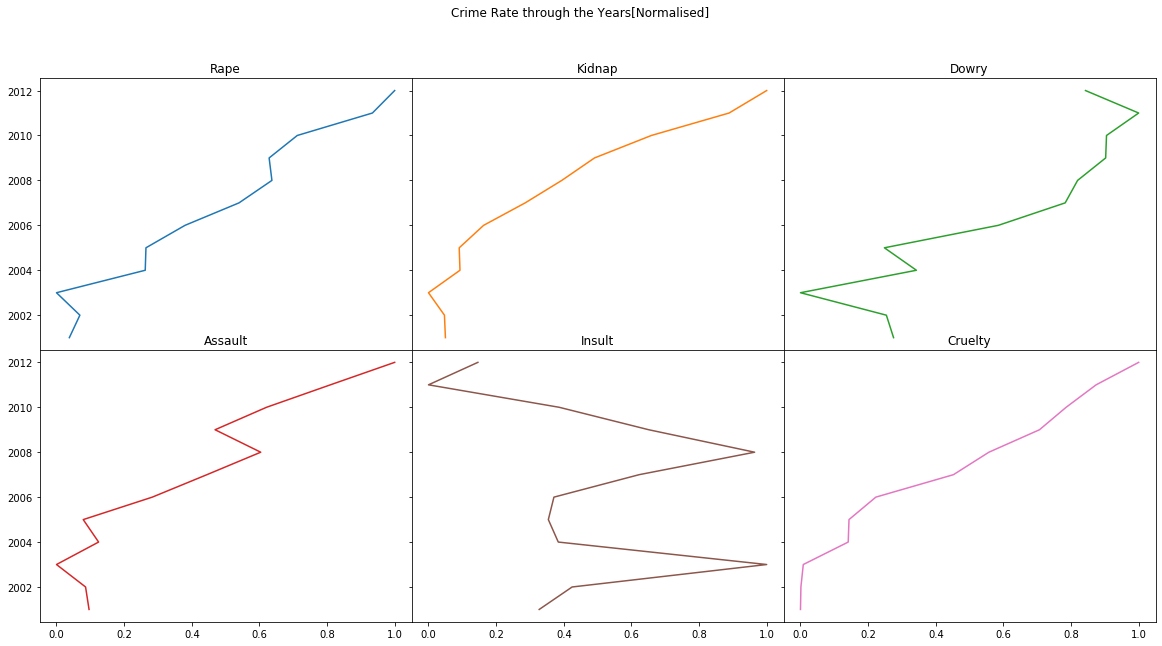

In [8]:
fig, ax = plt.subplots(2,3, sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=(20,10))

fig.suptitle('Crime Rate through the Years[Normalised]')

ax[0,0].plot(r_norm,everyYear.values, color="tab:blue", label="Rape")
ax[0,0].set_title('Rape')

ax[0,1].plot(kidnap_norm,everyYear.values, color="tab:orange", label="Kidnap")
ax[0,1].set_title('Kidnap')

ax[0,2].plot(dowry_norm,everyYear.values, color="tab:green", label="Dowry")
ax[0,2].set_title('Dowry')

ax[1,0].plot(assault_norm,everyYear.values, color="tab:red", label="Assault")
ax[1,0].set_title('Assault')

ax[1,1].plot(insult_norm,everyYear.values, color="tab:brown", label="Insult")
ax[1,1].set_title('Insult')

ax[1,2].plot(cruelty_norm,everyYear.values, color="tab:pink", label="Cruelty")
ax[1,2].set_title('Cruelty')
# plt.xlabel("Crimes")
# plt.ylabel("Year")
# plt.legend(handles=[Rape, Kidnap, Dowry, Assault, Insult, Cruelty], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# ax.plot(Rape)

### Five highest values - Insult to modesty of women.

In [9]:
pd.set_option('display.max_colwidth', -1)
yrs_total.nlargest(5, 'Insult to modesty of Women')


,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
2095,UTTAR PRADESH,TOTAL,2003,911,1499,1322,1098,4970,2626,0
6669,ANDHRA PRADESH,TOTAL,2010,1362,1531,588,4634,4562,12080,0
8239,ANDHRA PRADESH,TOTAL,2012,1341,1403,504,4816,3714,13389,0
7448,ANDHRA PRADESH,TOTAL,2011,1442,1612,599,4849,3658,13376,0
5137,ANDHRA PRADESH,TOTAL,2008,1257,1396,556,4730,3551,10306,0


# Reading another Dataset: Population of India in the year 2001 and 2011

To make myself familirize with the data, I've only studied the data from 2001 and applied some commonly known operations.

In [10]:
# Read the population data from 2001
pop01to11 = pd.read_csv('data/pop2001to11.csv')

pop01 = pop01to11[['India/State/Union Territory', 'Total - 2001']]
pop01.iloc[0]
pop01['India/State/Union Territory'].unique()


pop01 = pop01.drop(pop01.index[0])

### Making this data compatible with the previous dataset:
- The row 'India' from population dataset.
- Applying uppercase to every State/UT.

In [11]:
pop01['India/State/Union Territory'] = pop01['India/State/Union Territory'].str.upper()

pop01.sample(5)

,India/State/Union Territory,Total - 2001
17,MANIPUR,2293896
27,UTTAR PRADESH,166197921
22,PUNJAB,24358999
8,GUJARAT,50671017
31,CHANDIGARH,900635


## Applying inner join to combine the data based on:
 - On left: All the States and Union territory of Populations data.
 - On Right: All the states and Union terriroty of data about Crimes on women.

In [12]:
combine = pd.merge(left=pop01, right=dt1, how='inner', left_on='India/State/Union Territory', right_on='STATE/UT')
# combine.drop(combine.index[1])
combine.sample(5)

,India/State/Union Territory,Total - 2001,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
286,TAMIL NADU,62405679,TAMIL NADU,TOTAL,2011,677,1743,152,1467,464,1812,0
292,TRIPURA,3199203,TRIPURA,TOTAL,2005,162,43,34,161,1,439,0
281,TAMIL NADU,62405679,TAMIL NADU,TOTAL,2006,457,718,187,1179,852,1248,0
247,PUNJAB,24358999,PUNJAB,TOTAL,2008,517,514,128,388,49,984,0
303,UTTAR PRADESH,166197921,UTTAR PRADESH,TOTAL,2004,1397,2324,1708,1900,2682,4950,3


 Advance statistics: 
- Let's calculate the ratios of population to each type of crime reported.
- Description of Selected states based on population and different crimes.

In [13]:
rapesRatio01 = pd.DataFrame(columns = ['Values', 'States'])

rapesRatio01['Values'] = combine['Total - 2001'] / combine.Rape
rapesRatio01['States'] = combine['India/State/Union Territory']
rapesRatio01.sample(5)

,Values,States
98,48237.301587,HIMACHAL PRADESH
382,158204.000000,DAMAN & DIU
251,35822.057353,PUNJAB
39,59711.157554,BIHAR
256,56905.526687,RAJASTHAN


##### The above ratio represents:
- For every 87497 people in Andhra Pradesh, there is exactly one women victim who has been assaulted of the crime mentioned.
- "inf" represents that there hasn't been a single rape case reported in that region. 

In [14]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
combine.mean(axis=0)

Total - 2001                                          29849615.559
Year                                                  2006.500    
Rape                                                  570.375     
Kidnapping and Abduction                              608.473     
Dowry Deaths                                          219.657     
Assault on women with intent to outrage her modesty   1092.208    
Insult to modesty of Women                            299.919     
Cruelty by Husband or his Relatives                   2107.819    
Importation of Girls                                  2.184       
dtype: float64

### Exploring the data using functions:
- Descibe(): Count, mean, standard deviation etc.
- Few statistics about random states.

In [15]:
dt2['Rape'].describe()

count   34.000  
mean    461.588 
std     629.364 
min     0.000   
25%     18.500  
50%     227.500 
75%     769.750 
max     2851.000
Name: Rape, dtype: float64

In [16]:
dt2['Dowry Deaths'].describe()

count   34.000  
mean    198.176 
std     407.766 
min     0.000   
25%     0.000   
50%     41.500  
75%     253.750 
max     2211.000
Name: Dowry Deaths, dtype: float64

In [17]:
dt2[dt2['STATE/UT'] == 'MAHARASHTRA']

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
397,MAHARASHTRA,TOTAL,2001,1302,611,308,2823,1120,6090,1


In [18]:
dt2[dt2['STATE/UT'] == 'BIHAR']

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
115,BIHAR,TOTAL,2001,888,518,859,562,21,1558,83


In [19]:
dt2[dt2['STATE/UT'] == 'MADHYA PRADESH']

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
351,MADHYA PRADESH,TOTAL,2001,2851,668,609,7063,751,2562,0


In [20]:
dt2[dt2['STATE/UT'] == 'WEST BENGAL']

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
688,WEST BENGAL,TOTAL,2001,709,695,265,954,48,3859,3


### Dowry Deaths more than 500 in one state in particular year.

In [21]:
dt2[dt2['Dowry Deaths'] >=500]

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
115,BIHAR,TOTAL,2001,888,518,859,562,21,1558,83
351,MADHYA PRADESH,TOTAL,2001,2851,668,609,7063,751,2562,0
650,UTTAR PRADESH,TOTAL,2001,1958,2879,2211,2870,2575,7365,0


### Some pandas operations:

In [22]:
yrs = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]
yrsdata = data1[data1.Year.isin(yrs)]
yrs_total = yrsdata[yrsdata.DISTRICT == "TOTAL"]
yrs = yrs_total.sort_values('STATE/UT')
# yrs


### Generating population of missing year using statistical data binning:


Population of year 2001: x
Population of year 2011: y

    z = y-x
    s = z/9
    
    Population 2002: x+s
               2003: x+2s
               2004: x+3s etc
               
#### We will store this in Dataframe object.

In [23]:
pop01and11 = pop01to11[['India/State/Union Territory', 'Total - 2001', 'Total - 2011' ]]

pop02to10 = pd.DataFrame(columns=[ 'India/State/Union Territory', 'Total - 2002', 'Total - 2003', 'Total - 2004', 'Total - 2005', 'Total - 2006', 'Total - 2007', 'Total - 2008', 'Total - 2009', 'Total - 2010'])

for index, row in pop01and11.iterrows():
    x = int(row[2]) - int(row[1])
    x=int(x/9)   
    pop02to10 = pop02to10.append({ 'India/State/Union Territory' : row[0], 'Total - 2002' : row[1] + x, 'Total - 2003' : row[1] + 2*x, 'Total - 2004' : row[1] + 3*x, 'Total - 2005' : row[1] + 4*x, 'Total - 2006' : row[1] + 5*x, 'Total - 2007' : row[1] + 6*x, 'Total - 2008' : row[1] + 7*x, 'Total - 2009' : row[1] + 8*x, 'Total - 2010' : row[1] + 9*x }, ignore_index =True)
    
#     print(index)
pop02to10.sample(5)

,India/State/Union Territory,Total - 2002,Total - 2003,Total - 2004,Total - 2005,Total - 2006,Total - 2007,Total - 2008,Total - 2009,Total - 2010
33,Daman & Diu,167653,177102,186551,196000,205449,214898,224347,233796,243245
20,Nagaland,1988755,1987474,1986193,1984912,1983631,1982350,1981069,1979788,1978507
2,Arunachal Pradesh,1129719,1161470,1193221,1224972,1256723,1288474,1320225,1351976,1383727
19,Mizoram,911754,934935,958116,981297,1004478,1027659,1050840,1074021,1097202
34,Lakshadweep,61074,61498,61922,62346,62770,63194,63618,64042,64466


##### Merge the data with actual population of 2001 and 2011

In [24]:
pop = pd.merge(left=pop01and11, right=pop02to10, how='inner', left_on='India/State/Union Territory', right_on='India/State/Union Territory')
pop = pop[['India/State/Union Territory', 'Total - 2001', 'Total - 2002','Total - 2003','Total - 2004','Total - 2005','Total - 2006','Total - 2007','Total - 2008', 'Total - 2009', 'Total - 2010', 'Total - 2011']]
pop = pop.rename(index=str, columns={"Total - 2001" : "2001", "Total - 2002": "2002", "Total - 2003": "2003", "Total - 2004": "2004", "Total - 2005": "2005", "Total - 2006": "2006", "Total - 2007": "2007", "Total - 2008": "2008", "Total - 2009": "2009", "Total - 2010": "2010", "Total - 2011": "2011"  })
pop.sample(5)

,India/State/Union Territory,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
24,Sikkim,540851,548598,556345,564092,571839,579586,587333,595080,602827,610574,610577
11,Jammu & Kashmir,10143700,10410100,10676500,10942900,11209300,11475700,11742100,12008500,12274900,12541300,12541302
4,Bihar,82998509,85343058,87687607,90032156,92376705,94721254,97065803,99410352,101754901,104099450,104099452
35,Puducherry,974345,1004745,1035145,1065545,1095945,1126345,1156745,1187145,1217545,1247945,1247953
2,Arunachal Pradesh,1097968,1129719,1161470,1193221,1224972,1256723,1288474,1320225,1351976,1383727,1383727
